In [1]:
!git clone https://github.com/NearANDfar13/NLP_Winter_2024.git

Cloning into 'NLP_Winter_2024'...
remote: Enumerating objects: 103, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 103 (delta 46), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (103/103), 3.28 MiB | 10.25 MiB/s, done.
Resolving deltas: 100% (46/46), done.


In [2]:
#Import the dataset "San Fran New Sample"
import pandas as pd

df = pd.read_excel('/content/NLP_Winter_2024/NA_San_Fran_New_Sample.xlsx')

#Display DataFrame 'df'
df.head()

,ID,Day,Short_Name,Full_Name,Place,Frequency,Publication,Text,Page,Link,Datengeber
0,2797055-3,19/04/1906,Badische Presse,Badische Presse : Generalanzeiger der Residenz...,Karlsruhe,täglich,1890-1944,Die Marinestationen am Süllen Ozean versuchten...,4.0,NaN,NaN
1,2958285-4,19/04/1906,Der Beobachter,"Der Beobachter, ein Volksblatt aus Schwaben","Stuttgart, Württemberg",täglich,1833-1920,"Erdbeben in Ealifornien. New-Sjork, 18. April....",3.0,https://www.deutsche-digitale-bibliothek.de/ne...,Württembergische Landesbibliothek
2,2436020-X,19/04/1906,Berliner Börsen-Zeitung,"Berliner Börsen-Zeitung, Tageszeitung für Poli...",Berlin,täglich,1857-1938,richten lassen die Verwüstung noch größer ersc...,5.0,https://www.deutsche-digitale-bibliothek.de/ne...,NaN
3,3144747-8,19/04/1906,Cannstatter Zeitung,"Cannstatter Zeitung, allgemeiner Anzeiger für ...","Stuttgart, Cannstatt, Stuttgart-Bad Cannstatt,...",täglich,1896-1914,"Cincinnati, 18. April. Einem hiesigen Blatte w...",1.0,https://www.deutsche-digitale-bibliothek.de/ne...,NaN
4,3144747-8,19/04/1906,Cannstatter Zeitung,"Cannstatter Zeitung, allgemeiner Anzeiger für ...","Stuttgart, Cannstatt, Stuttgart-Bad Cannstatt,...",täglich,1896-1914,"Newyork, 19. April. Ten letzten Nachrichten an...",3.0,https://www.deutsche-digitale-bibliothek.de/ne...,NaN


In [4]:
import re
#Function to clean

def initial_clean(text):
    text = re.sub(r'[^\w\s]','',text)
    text = text.lower()
    return text

df['cleaned'] = df['Text'].apply(initial_clean)
df['cleaned'][:5]

,cleaned
0,die marinestationen am süllen ozean versuchten...
1,erdbeben in ealifornien newsjork 18 april heut...
2,richten lassen die verwüstung noch größer ersc...
3,cincinnati 18 april einem hiesigen blatte wird...
4,newyork 19 april ten letzten nachrichten ans o...


In [6]:
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')

def tokenize(text):
  text = nltk.word_tokenize(text, language = 'german')
  return text

#continue the code
df['tokenized'] = df['cleaned'].apply(tokenize)
df['tokenized'][:5]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,tokenized
0,"[die, marinestationen, am, süllen, ozean, vers..."
1,"[erdbeben, in, ealifornien, newsjork, 18, apri..."
2,"[richten, lassen, die, verwüstung, noch, größe..."
3,"[cincinnati, 18, april, einem, hiesigen, blatt..."
4,"[newyork, 19, april, ten, letzten, nachrichten..."


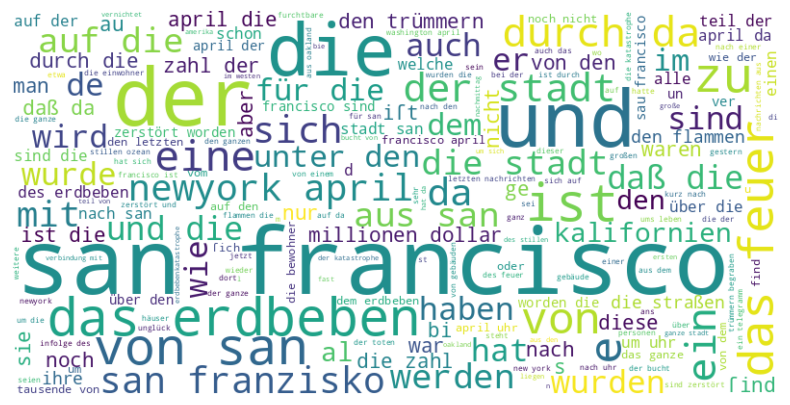

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Flatten the list of lists of lemmatized words into a single list
all_words = [word for sublist in df['tokenized'] for word in sublist]

# Create a string of all words
text = ' '.join(all_words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [8]:
import spacy
from nltk.corpus import stopwords

# Ensure the German language model is downloaded
!python -m spacy download de_core_news_sm

# Load the German language model
nlp = spacy.load('de_core_news_sm')

# Get German stop words and add custom ones
stop_words = set(stopwords.words('german'))
custom_stop_words = {'herr', 'frau', 'dez', 'januar', 'ge', 'nr', 'ſind', 'handeln'}
stop_words.update(custom_stop_words)

def lemmatize_and_remove_stopwords(texts):
    texts_out = []
    for sent in texts:
        # Join the tokens into a single string
        text = " ".join(sent)


        # Process the text with spaCy
        doc = nlp(text)

        # Lemmatize, lowercase, and remove stop words
        lemmatized = [token.lemma_.lower() for token in doc
                      if token.is_alpha and token.lemma_.lower() not in stop_words]

        texts_out.append(lemmatized)

    return texts_out

# Apply the function to the DataFrame
df['lemmatized'] = lemmatize_and_remove_stopwords(df['tokenized'])

# Display the first 5 rows of the lemmatized column
df['lemmatized'].head()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 31.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


,lemmatized
0,"[marinestatione, sülle, ozean, versuchen, verb..."
1,"[erdbeben, ealifornie, newsjork, april, heute,..."
2,"[richten, lassen, verwüstung, groß, erscheinen..."
3,"[cincinnati, april, hiesig, blatte, oakland, g..."
4,"[newyork, april, ten, letzter, nachricht, oakl..."


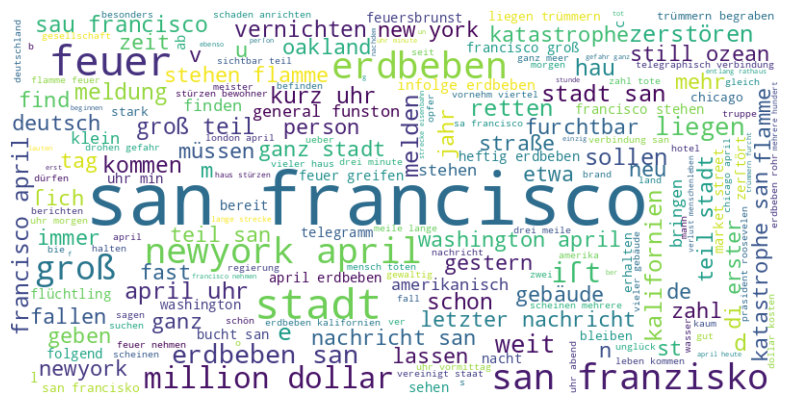

In [9]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Flatten the list of lists of lemmatized words into a single list
all_words = [word for sublist in df['lemmatized'] for word in sublist]

# Create a string of all words
text = ' '.join(all_words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [10]:
#POS Tagging
def tagging(texts, allowed_postags=['NOUN']): # possible tags'NOUN', 'ADJ', 'ADV', 'VERB'
    texts_out = []
    nlp = spacy.load('de_core_news_sm')
    for sent in texts:
        sent_str = " ".join(sent)
        doc = nlp(sent_str)
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

df['tagging'] = tagging(df['lemmatized'])
df['tagging'][:5]

,tagging
0,"[Marinestatione, Ozean, Verbindung, Bürgermeis..."
1,"[Uhr, Stadt, Minute, Heimgesucht, Find, Beschä..."
2,"[Verwüstung, angeben, Stadt, Umfang, californi..."
3,"[April, Oakland, Gefunke, Fein, Bestätigung, B..."
4,"[April, Nachricht, Lage, Teil, flamm, Fläch, q..."


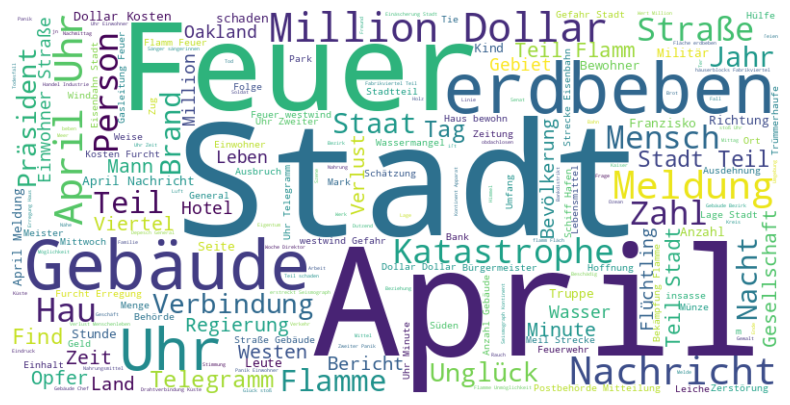

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Flatten the list of lists of lemmatized words into a single list
all_words = [word for sublist in df['tagging'] for word in sublist]

# Create a string of all words
text = ' '.join(all_words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [16]:
#POS Tagging with verbs
def tagging(texts, allowed_postags=['VERB']):
    texts_out = []
    nlp = spacy.load('de_core_news_sm')
    for sent in texts:
        sent_str = " ".join(sent)
        doc = nlp(sent_str)
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

df['tagging'] = tagging(df['lemmatized'])
df['tagging'][:5]

,tagging
0,"[versuch, organisieren, suchen, bringen, errei..."
1,"[erdbeben, erdbeben, zerstören, erhalten, betr..."
2,"[richten, lassen, erscheinen, nehmen, finden, ..."
3,"[Melde, buchen, ankert, gerücht, liegen, zeige..."
4,"[betragen, finden, zerstören, töten, eingestür..."


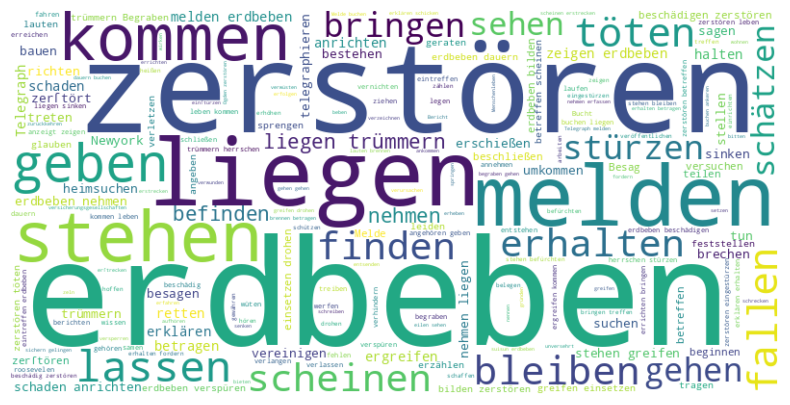

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Flatten the list of lists of lemmatized words into a single list
all_words = [word for sublist in df['tagging'] for word in sublist]

# Create a string of all words
text = ' '.join(all_words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
#POS Tagging with adjectives
def tagging(texts, allowed_postags=['ADJ']):
    texts_out = []
    nlp = spacy.load('de_core_news_sm')
    for sent in texts:
        sent_str = " ".join(sent)
        doc = nlp(sent_str)
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

df['tagging'] = tagging(df['lemmatized'])
df['tagging'][:5]

,tagging
0,"[Herzustelle, erlangen, gekommen, Reutersche, ..."
1,"[postbehörd, angel, schaden, eingestürzen, Zwe..."
2,"[Feuer, erdbeben, letzter, heimsuch, meil, lan..."
3,"[Blatte, Erdbeben, erster, ereignen, erdbeben,..."
4,"[letzter, Palo, vernicht, roosevel, töt, verle..."


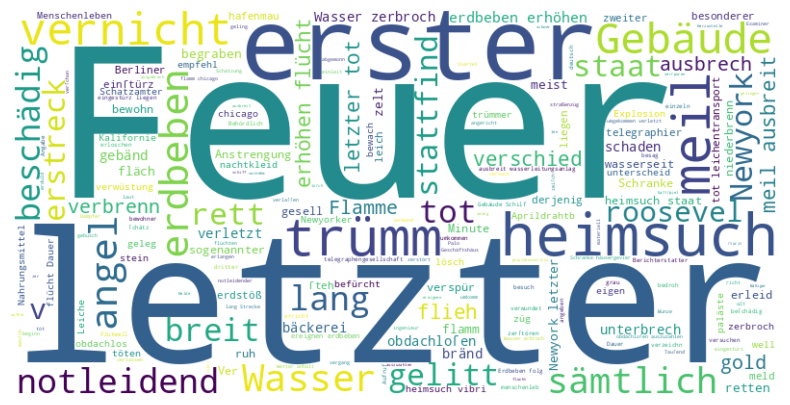

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Flatten the list of lists of lemmatized words into a single list
all_words = [word for sublist in df['tagging'] for word in sublist]

# Create a string of all words
text = ' '.join(all_words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [12]:
#Term Freqency Inverse Document Freqency
from sklearn.feature_extraction.text import TfidfVectorizer


# Convert the lists in 'tagging' column to strings
df['lemmatized_str'] = df['lemmatized'].apply(lambda x: ' '.join(x))

# Create and fit the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=50000)  # You can adjust max_features as needed
tfidf_matrix = tfidf_vectorizer.fit_transform(df['lemmatized_str'])

# Get feature names (words) and their TF-IDF scores
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.sum(axis=0).A1
print("Feature Names:", feature_names)
print("TF-IDF Scores:", tfidf_scores)

# Create a DataFrame with words and their TF-IDF scores
word_tfidf_df = pd.DataFrame({'word': feature_names, 'tfidf_score': tfidf_scores})

# Sort by TF-IDF score in descending order (most frequent/important words first)
word_tfidf_df = word_tfidf_df.sort_values('tfidf_score', ascending=False)

# Select top N words (you can adjust this number)
top_n = 1000
top_words = word_tfidf_df['word'].head(top_n).tolist()

# Create the 'j' column in the original DataFrame
df['vectorized'] = df['tagging'].apply(lambda x: [word for word in x if word in top_words])

df['vectorized']


Feature Names: ['aach' 'aachener' 'aachenmnnckencr' ... 'ſſtr' 'ꝛc' 'ꝛen']
TF-IDF Scores: [0.16749366 0.03146237 0.06139927 ... 0.09829638 0.19126005 0.25117522]


,vectorized
0,"[erdbeben, flüchten, ztg, häuserblocks, schade..."
1,"[tote, flamm, zahl, tote, töten, westwind, beben]"
2,"[angeben, erdbeben, schaden, erdbeben, quadrat..."
3,"[sängerinnen, erlangen, stoß, erdstöße, erdbeb..."
4,"[flamm, verschonen, erdbeben, insasse, bewohne..."
...,...
141,"[ſeien, bewachen, jn, jn, ſeien, perſon, ſeien..."
142,"[bränd, erdbeben]"
143,"[bestehen, erdbeben]"
144,"[verbrennen, hoffen, leben, züge]"


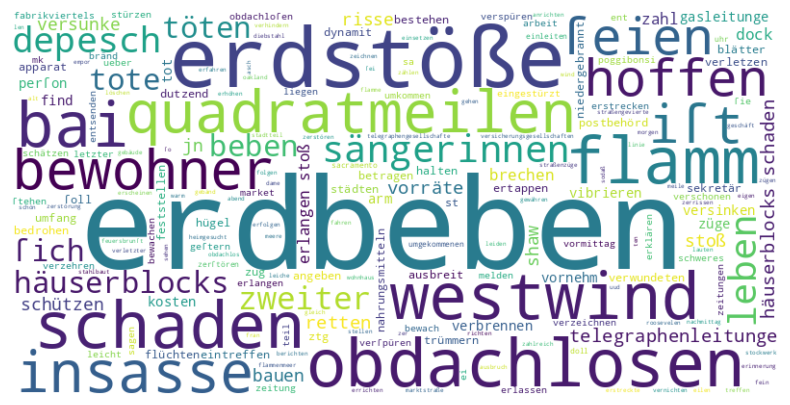

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Flatten the list of lists of lemmatized words into a single list
all_words = [word for sublist in df['vectorized'] for word in sublist]

# Create a string of all words
text = ' '.join(all_words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()